In [19]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [5]:
def get_data():
    np.random.seed(42)
    train_X = np.random.rand(17)
    train_Y = np.random.rand(17)
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad=False).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad=False)
    return X, y

In [10]:
def get_weights():
    w = Variable(torch.randn(1), requires_grad=True)
    b = Variable(torch.randn(1), requires_grad=True)
    return w, b

In [11]:
def simple_network(x):
    y_pred = torch.matmul(x, w) + b
    return y_pred

In [16]:
def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in (w, b):
        if not param.grad is None:
            param.grad.data.zero_()
        loss.backward(retain_graph=True)
    return loss.data[0]

In [13]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [ ]:
x = torch.rand(10)

In [ ]:
x

In [ ]:
x.size()

In [ ]:
x.sigmoid()

In [ ]:
y = torch.rand(1)

In [ ]:
y

In [ ]:
y.size()

In [ ]:
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)

In [ ]:
%%time
a.matmul(b)

In [ ]:
a = a.cuda()

In [ ]:
b = b.cuda()

In [ ]:
%%time
a.matmul(b)

In [ ]:
x = Variable(torch.ones(2, 2), requires_grad=True)

In [ ]:
y = x.mean()

In [ ]:
y

In [ ]:
y.backward()

In [ ]:
y

In [ ]:
x.grad

In [ ]:
x.grad_fn

In [ ]:
y.grad_fn

In [8]:
print(get_data())

(tensor([[0.3745],
        [0.9507],
        [0.7320],
        [0.5987],
        [0.1560],
        [0.1560],
        [0.0581],
        [0.8662],
        [0.6011],
        [0.7081],
        [0.0206],
        [0.9699],
        [0.8324],
        [0.2123],
        [0.1818],
        [0.1834],
        [0.3042]]), tensor([0.5248, 0.4319, 0.2912, 0.6119, 0.1395, 0.2921, 0.3664, 0.4561, 0.7852,
        0.1997, 0.5142, 0.5924, 0.0465, 0.6075, 0.1705, 0.0651, 0.9489]))


In [4]:
np.random.rand?

In [17]:
learning_rate = 0.01
x, y = get_data()
w, b = get_weights()
for i in range(500):
    y_pred = simple_network(x)
    loss = loss_fn(y, y_pred)
    if i % 50 == 0:
        print(loss)
    optimize(learning_rate)

tensor(54.4656)
tensor(1.0521)
tensor(1.0218)
tensor(1.0215)
tensor(1.0215)
tensor(1.0215)
tensor(1.0215)
tensor(1.0215)
tensor(1.0215)
tensor(1.0215)


In [18]:
print(w, b)

tensor([0.0523], requires_grad=True) tensor([0.3900], requires_grad=True)


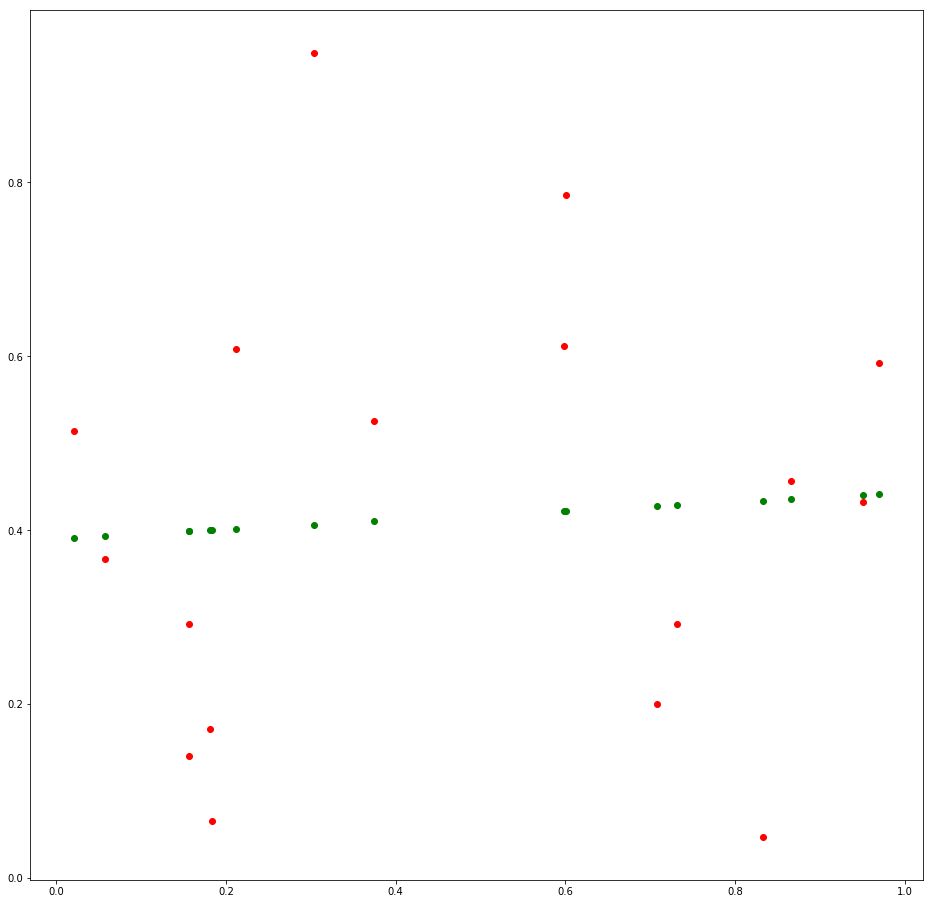

In [25]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(x, y, color='red')
ax.scatter(x, y_pred.detach().numpy(), color='green')